# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión lineal: Lección 1**
### **Machine Learning: Introducción**

---

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.


In [18]:
# tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

import os


**Objetivos**

1. Buscar un conjunto de datos a analizar:
- Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.


In [21]:
os.getcwd()

'/mnt/c/Users/User/Desktop/ADALAB/MODULO3/promo-d-da-modulo3-sprint1-elisa-lidya'

In [20]:
os.chdir('promo-d-da-modulo3-sprint1-elisa-lidya')

In [24]:
df_games = pd.read_csv("datos/PS4_GamesSales.csv")
df_games.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
- Esto se hace para que comprendais mejor los datos con los que estais trabajando.
- Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [26]:
df_games.shape

(1034, 9)

In [27]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    float64
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
 8   Global         1034 non-null   float64
dtypes: float64(6), object(3)
memory usage: 72.8+ KB


In [29]:
df_games.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [31]:
df_games['Year'] = df_games['Year'].astype(dtype='Int64')

In [32]:
df_games.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [35]:
df_games.drop('Global', axis=1, inplace=True)

In [33]:
df_games.duplicated().sum()

0

In [36]:
numericas = df_games.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,Year,North America,Europe,Japan,Rest of World
0,2014,6.06,9.71,0.60,3.02
1,2015,6.18,6.05,0.41,2.44


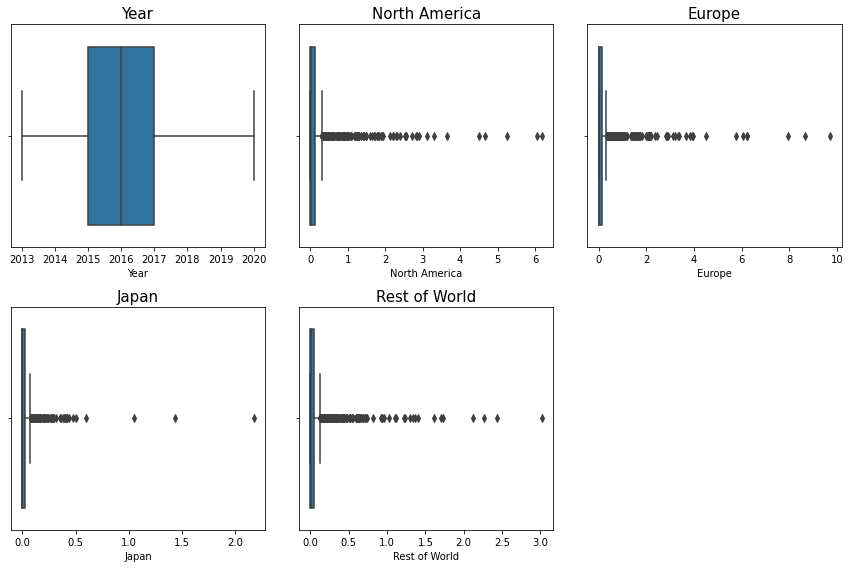

In [37]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12,8))
axes = axes.flat

numericas = df_games.select_dtypes(include = np.number).columns

for i, col in enumerate(numericas):

    sns.boxplot(df_games[col], ax = axes[i])
    axes[i].set_title(col, fontsize = 15)

fig.tight_layout()
fig.delaxes(axes[-1]);

In [39]:
df_games.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,825.0,2015.966061,1.298360,2013.0,2015.0,2016.00,2017.00,2020.00
North America,1034.0,0.204613,0.563471,0.0,0.0,0.02,0.12,6.18
Europe,1034.0,0.248714,0.785491,0.0,0.0,0.00,0.13,9.71
Japan,1034.0,0.033636,0.108344,0.0,0.0,0.00,0.03,2.17
Rest of World,1034.0,0.089014,0.249410,0.0,0.0,0.01,0.05,3.02


In [43]:
df_games['Europe'].value_counts()

0.00    578
0.01     26
0.02     23
0.06     22
0.04     21
       ... 
1.60      1
1.56      1
1.50      1
2.18      1
0.93      1
Name: Europe, Length: 139, dtype: int64